In [215]:
import operator
import math
cost_type = [["shortest","passive"],["shortestfastest","passive"]]
names = [ ["bison_dire", True, "crimson","bis"] , ["cattle_dire", True, "green","cat"] , ["primate",False, "blue","pri"], ["racoon", False, "brown","rac"], ["sheep_dire",True,"olive","she"], ["weaver", False, "pink","wea"], ["employees", False, "red","emp"], ["voles", False, "black", "vol"]]
#names = [["employees", False, "red","emp"], ["voles", False, "black", "vol"]]
which=["bell", "dij", "bfs"]

In [216]:
def nb_edges(s):
    with open(s, 'r') as fp:
        for count, line in enumerate(fp):
            pass
    return count
def nb_nodes(s):
    nodes = set()
    sep = -1
    with open(s, 'r') as file_data: 
        for line in file_data:
#             print("line", line)
            if sep == -1:
                for e in line:
#                     print("e",e)
                    if not (ord(e) >= ord('0') and ord(e) <= ord('9')):
                        sep = e
                        break
#             print("sep", sep)
            line = line[:-1]
            data = line.split(e)
#             print("data", data) 
            nodes.add(data[0])
            nodes.add(data[1])
    return len(nodes)
def nb_time_events(s):
    ev = set()
    sep = -1
    with open(s, 'r') as file_data: 
        for line in file_data:
#             print("line", line)
            if sep == -1:
                for e in line:
#                     print("e",e)
                    if not (ord(e) >= ord('0') and ord(e) <= ord('9')):
                        sep = e
                        break
#             print("sep", sep)
            line = line[:-1]
            data = line.split(e)
#             print("data", data) 
            ev.add(data[2])
    return len(ev)
    

In [217]:
fold_d = "databases/"
for i in range(len(names)):
    cur = fold_d + names[i][0]+".csv"
#     print(names[i][0], nb_nodes(cur),nb_time_events(cur),nb_edges(cur))
    count = nb_nodes(cur)*nb_edges(cur)*nb_time_events(cur)
#     count = nb_time_events(cur)
    names[i].insert(0,count)
print(names)
names.sort(reverse = True)
names = [ names[i][1:] for i in range(len(names))  ]
print(names)
for i in range(len(names)):
    cur = fold_d + names[i][0]+".csv"
    print(names[i][0], "& $", nb_nodes(cur), "$ & $", nb_time_events(cur), "$ & $" ,nb_edges(cur), "$")

[[113932, 'bison_dire', True, 'crimson', 'bis'], [60480, 'cattle_dire', True, 'green', 'cat'], [636025, 'primate', False, 'blue', 'pri'], [2491008, 'racoon', False, 'brown', 'rac'], [83664, 'sheep_dire', True, 'olive', 'she'], [14584875, 'weaver', False, 'pink', 'wea'], [122691162807, 'employees', False, 'red', 'emp'], [565398414, 'voles', False, 'black', 'vol']]
[['employees', False, 'red', 'emp'], ['voles', False, 'black', 'vol'], ['weaver', False, 'pink', 'wea'], ['racoon', False, 'brown', 'rac'], ['primate', False, 'blue', 'pri'], ['bison_dire', True, 'crimson', 'bis'], ['sheep_dire', True, 'olive', 'she'], ['cattle_dire', True, 'green', 'cat']]
employees & $ 151 $ & $ 16067 $ & $ 50571 $
voles & $ 1686 $ & $ 63 $ & $ 5323 $
weaver & $ 445 $ & $ 23 $ & $ 1425 $
racoon & $ 24 $ & $ 52 $ & $ 1996 $
primate & $ 25 $ & $ 19 $ & $ 1339 $
bison_dire & $ 26 $ & $ 14 $ & $ 313 $
sheep_dire & $ 28 $ & $ 12 $ & $ 249 $
cattle_dire & $ 28 $ & $ 10 $ & $ 216 $


In [218]:
fold = "time_computation/"

In [219]:
import os.path
import numpy
d = { e[0] : { tuple(c):{ w:numpy.Infinity  for w in which  }  for c in cost_type  }  for e in names   }
for e in names:
    for c in cost_type:
        for w in which:
            current = current = e[0]+".csv"+"_"+c[0]+"_"+c[1]+"_"+w
            if os.path.isfile(fold+current):
                with open(fold+current,"r") as f:
                    d[e[0]][tuple(c)][w] = float(f.read()[:5])

{'bell': (inf, inf, 7022.0, 162.3, 16.56, 0.56, 0.343, 0.167), 'dij': (618.2, 29.09, 0.203, 0.455, 0.122, 0.018, 0.012, 0.008), 'bfs': (136.3, 2.467, 0.01, 0.083, 0.025, 0.002, 0.001, 0.0)}


<Figure size 1600x800 with 0 Axes>

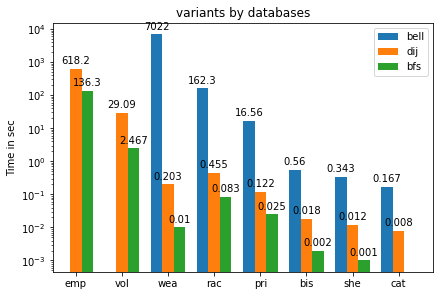

In [220]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)
#reaplces species with names
c = ["shortest","passive"]
#replace penguin_means with val
which=["bell", "dij",  "bfs"]
val = {
    w: tuple( (d[e[0]][tuple(c)][w]) for e in names) for w in which
}
print(val)

x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in val.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in sec')
ax.set_yscale('log')
ax.set_title('variants by databases')
ax.set_xticks(x + width, list(map(lambda x : x[-1], names)) )
ax.legend(loc='upper right')
# ax.set_ylim(0, 7)
plt.savefig('sh_db.png', dpi=300)

plt.show()

{'bell': (inf, inf, 6745.0, 133.2, 12.73, 0.535, 0.335, 0.172), 'dij': (5411.0, 31.27, 0.198, 0.731, 0.097, 0.019, 0.016, 0.011)}


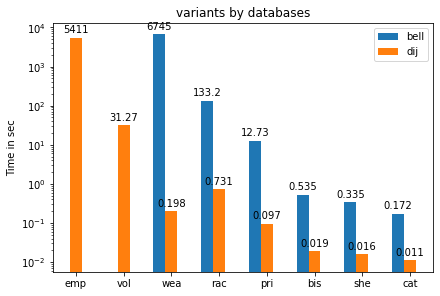

In [221]:
import matplotlib.pyplot as plt
import numpy as np
#reaplces species with names
c = ["shortestfastest","passive"]
#replace penguin_means with val
which = ["bell","dij"]
val = {
    w: tuple(d[e[0]][tuple(c)][w] for e in names) for w in which
}
print(val)

x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in val.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in sec')
ax.set_yscale('log')
ax.set_title('variants by databases')
ax.set_xticks(x + width, list(map(lambda x : x[-1], names)) )
ax.legend(loc='upper right')
# ax.set_ylim(0, 7)
plt.savefig('shf_db.png', dpi=300)

plt.show()